In [1]:
%% Load demonstrations and define paths
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
dataPath  = '../data/'; % Data path
load([dataPath 'toyExampleMSDstiffnessLearning.mat']);
path(path,'../manifolds');
path(path,'../gmm_gmr');

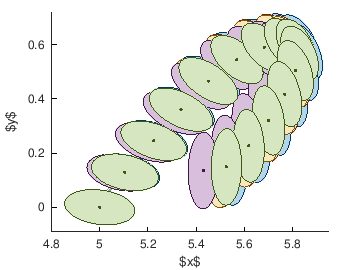

In [4]:
for j=1:5
    m1=1;dt=0.02;xr=[];
    for n=1:5
        %plot(dD(j).demo(n).DataP(1,:),dD(j).demo(n).DataP(2,:));
        xr = [xr dD(j).demo(n).DataP(posId,end)];
    end
    xR1  = g;                   % Rest and goal position of the mass 1 (c)
    traj(j).x1(:,1)   = xR1;            % Initial position for the mass 1
    dx1(:,1)  = zeros(2,1);     % Initial velocity for the mass 1
    ddx1(:,1) = zeros(2,1);     % Initial acceleration for the mass 1
    f1 = zeros(2,1);
    Fe = dD(j).avgFe;
    for i = 2 : nbData
        % Stiffness matrices $K_t$ estimated from least squares.
        k1 = dD(j).KP(:,:,i);
        % Solving the system, 1st the acceleration of the mass is computed
        f1(:,i-1) = k1 * ( xR1 - traj(j).x1(:,i-1) );
        ddx1(:,i) = (Fe(:,i-1) + f1(:,i-1) - D * dx1(:,i-1)) / m1;
        % Euler integration
        % Finding the velocity for the mass
        dx1(:,i)  = dx1(:,i-1) + ddx1(:,i) * dt;
        % Computing the position
        traj(j).x1(:,i) = traj(j).x1(:,i-1) + dx1(:,i) * dt;
    end
end
gmmMSD1=figure('position',[10 10 350 270],'color',[1 1 1]);
%subplot(2,5,1);hold on
for j=1:5
    plot(traj(j).x1(1,:),traj(j).x1(2,:), 'Color', [.6 .6 .6],'linewidth',2);
    hold on;
end
clrmap = lines(5);
for n=1:5
    %subplot(2,4,2+n);  hold on;
    for t=round(linspace(1,nbData-rdp,15))
        plotGMM2([traj(n).x1(1,t);traj(n).x1(2,t)], ...
            4E-5*X(4:5,4:5,t+(n-1)*(nbData-rdp)), clrmap(n,:), .3); % Scaled matrix!
    end
end
axis([4.8 5.95 -0.09 0.72])
xlabel('$x$', 'Fontsize', 13, 'Interpreter', 'Latex');
ylabel('$y$', 'Fontsize', 13, 'Interpreter', 'Latex');set(gca,'box','off')
set(gca, 'FontSize', 12,'TickLabelInterpreter','latex');


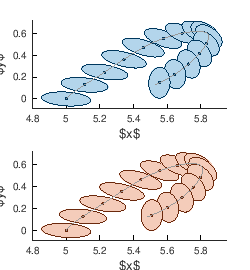

In [5]:
gmmMSD2=figure('position',[10 10 250 270],'color',[1 1 1]);
subplot(2,1,1);hold on
for n=1
    %subplot(2,4,2+n);  hold on;
    for t=round(linspace(1,nbData-rdp,15))
        plotGMM2([traj(n).x1(1,t);traj(n).x1(2,t)], ...
            4E-5*X(4:5,4:5,t+(n-1)*(nbData-rdp)), clrmap(n,:), .3); % Scaled matrix!
    end
    plot(traj(n).x1(1,:),traj(n).x1(2,:), 'Color', [.6 .6 .6],'linewidth',2);
end
%axis equal; 
axis([4.8 5.95 -0.09 0.72])
xlabel('$x$', 'Fontsize', 13, 'Interpreter', 'Latex');
ylabel('$y$', 'Fontsize', 13, 'Interpreter', 'Latex');

subplot(2,1,2);hold on
for n=2
    %subplot(2,4,2+n);  hold on;
    for t=round(linspace(1,nbData-rdp,15))
        plotGMM2([traj(n).x1(1,t);traj(n).x1(2,t)], ...
            4E-5*X(4:5,4:5,t+(n-1)*(nbData-rdp)), clrmap(n,:), .3); % Scaled matrix!
    end
    plot(traj(n).x1(1,:),traj(n).x1(2,:), 'Color', [.6 .6 .6],'linewidth',2);
end
%axis equal; 
axis([4.8 5.95 -0.09 0.72])
xlabel('$x$', 'Fontsize', 13, 'Interpreter', 'Latex');
ylabel('$y$', 'Fontsize', 13, 'Interpreter', 'Latex');

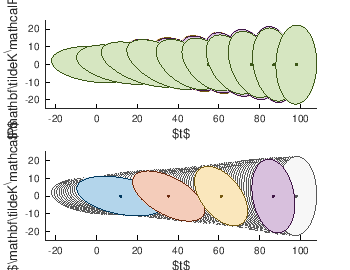

In [9]:
gmmMSD3=figure('position',[10 10 350 270],'color',[1 1 1]);
subplot(2,1,1);hold on
for n=1:5
    for i=round(linspace(1,(nbData-rdp),10))
        plotGMM2([i;0], X(4:5,4:5,i+(n-1)*(nbData-rdp)), clrmap(n,:), .3);
    end
end
axis([-25, (nbData-rdp)+10, -25, 25])
xlabel('$t$', 'Fontsize', 13, 'Interpreter', 'Latex');
ylabel('$\mathbf{\tilde{K}}^\mathcal{P}$', 'Interpreter', 'Latex', 'Fontsize', 13);

subplot(2,1,2);hold on
sc = 1/modelPD.dt;clrmap2 = prism(modelPD.nbStates);
for i=1:size(X,3) % Plotting man. ellipsoids from demonstration data
    plotGMM2([X(1,1,i)*sc; 0], X(out,out,i), [.7 .7 .7], .1);
end
for i=1:modelPD.nbStates % Plotting GMM of man. ellipsoids
    plotGMM2([modelPD.MuMan(1,1,i)*sc; 0], modelPD.MuMan(out,out,i), ...
        clrmap(i,:), .3);
end
axis([-25, (nbData-rdp)+10, -25, 25])
ylabel('$\mathbf{\tilde{K}}^\mathcal{P}$', 'Interpreter', 'Latex', 'Fontsize', 13);
xlabel('$t$', 'Fontsize', 13, 'Interpreter', 'Latex');